<a href="https://colab.research.google.com/github/thaisgulias/Eleicao2022_2Turno/blob/main/CASE_COLAB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Case Eleições 2022**


por Thais Gulias

1. Atualização do mapa com os dados do segundo turno;
2. Criação de um storytelling para qualquer outra métrica possível com os dados;
3. Jupyter notebook ou script em R do output gerado.

Dados usados estão disponíveis em: https://dadosabertos.tse.jus.br/dataset/resultados-2022

Nesta apresentação, exploraremos a análise dos dados do segundo turno de uma eleição recente, buscando compreender a distribuição geográfica dos votos e identificar padrões significativos. A análise desses dados é fundamental para uma compreensão mais profunda das preferências eleitorais em diferentes regiões.

Objetivos da Análise:
Nosso principal objetivo é investigar como os votos foram distribuídos geograficamente no segundo turno desta eleição. Queremos entender se há padrões claros de votação por candidato e se podemos identificar regiões com preferências eleitorais distintas.

In [71]:
pip install matplotlib pandas

In [72]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


In [73]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **`Votação_seção`**

Pré- análise

In [74]:
df_secao = pd.read_csv('/content/drive/MyDrive/casecolab/votacao_secao_2022_BR.csv', sep=';', decimal=',', encoding='latin1')

In [75]:
df_secao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5380736 entries, 0 to 5380735
Data columns (total 26 columns):
 #   Column                     Dtype 
---  ------                     ----- 
 0   DT_GERACAO                 object
 1   HH_GERACAO                 object
 2   ANO_ELEICAO                int64 
 3   CD_TIPO_ELEICAO            int64 
 4   NM_TIPO_ELEICAO            object
 5   NR_TURNO                   int64 
 6   CD_ELEICAO                 int64 
 7   DS_ELEICAO                 object
 8   DT_ELEICAO                 object
 9   TP_ABRANGENCIA             object
 10  SG_UF                      object
 11  SG_UE                      object
 12  NM_UE                      object
 13  CD_MUNICIPIO               int64 
 14  NM_MUNICIPIO               object
 15  NR_ZONA                    int64 
 16  NR_SECAO                   int64 
 17  CD_CARGO                   int64 
 18  DS_CARGO                   object
 19  NR_VOTAVEL                 int64 
 20  NM_VOTAVEL              

In [76]:
df_secao.isnull().sum()

DT_GERACAO                   0
HH_GERACAO                   0
ANO_ELEICAO                  0
CD_TIPO_ELEICAO              0
NM_TIPO_ELEICAO              0
NR_TURNO                     0
CD_ELEICAO                   0
DS_ELEICAO                   0
DT_ELEICAO                   0
TP_ABRANGENCIA               0
SG_UF                        0
SG_UE                        0
NM_UE                        0
CD_MUNICIPIO                 0
NM_MUNICIPIO                 0
NR_ZONA                      0
NR_SECAO                     0
CD_CARGO                     0
DS_CARGO                     0
NR_VOTAVEL                   0
NM_VOTAVEL                   0
QT_VOTOS                     0
NR_LOCAL_VOTACAO             0
SQ_CANDIDATO                 0
NM_LOCAL_VOTACAO             0
DS_LOCAL_VOTACAO_ENDERECO    0
dtype: int64

In [77]:
df_secao.duplicated().sum()

0

In [78]:
df_secao_2t = df_secao.query('NR_TURNO == 2')
len(df_secao_2t)

1850892

In [79]:
df_secao_2t['NM_VOTAVEL'].unique()

array(['LUIZ INÁCIO LULA DA SILVA', 'JAIR MESSIAS BOLSONARO', 'VOTO NULO',
       'VOTO BRANCO'], dtype=object)

In [80]:
df_secao_2t.corr()

<ipython-input-80-5700636fb695>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_secao_2t.corr()


,ANO_ELEICAO,CD_TIPO_ELEICAO,NR_TURNO,CD_ELEICAO,CD_MUNICIPIO,NR_ZONA,NR_SECAO,CD_CARGO,NR_VOTAVEL,QT_VOTOS,NR_LOCAL_VOTACAO,SQ_CANDIDATO
ANO_ELEICAO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CD_TIPO_ELEICAO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NR_TURNO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CD_ELEICAO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CD_MUNICIPIO,NaN,NaN,NaN,NaN,1.000000,0.248749,-0.012912,NaN,0.008896,0.006780,-0.087591,-0.009004
NR_ZONA,NaN,NaN,NaN,NaN,0.248749,1.000000,0.017026,NaN,0.007757,0.016353,-0.085457,-0.007843
NR_SECAO,NaN,NaN,NaN,NaN,-0.012912,0.017026,1.000000,NaN,0.003886,0.043926,0.594718,-0.003944
CD_CARGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NR_VOTAVEL,NaN,NaN,NaN,NaN,0.008896,0.007757,0.003886,NaN,1.000000,-0.848737,0.001447,-0.996582
QT_VOTOS,NaN,NaN,NaN,NaN,0.006780,0.016353,0.043926,NaN,-0.848737,1.000000,0.025913,0.849961


# Análise

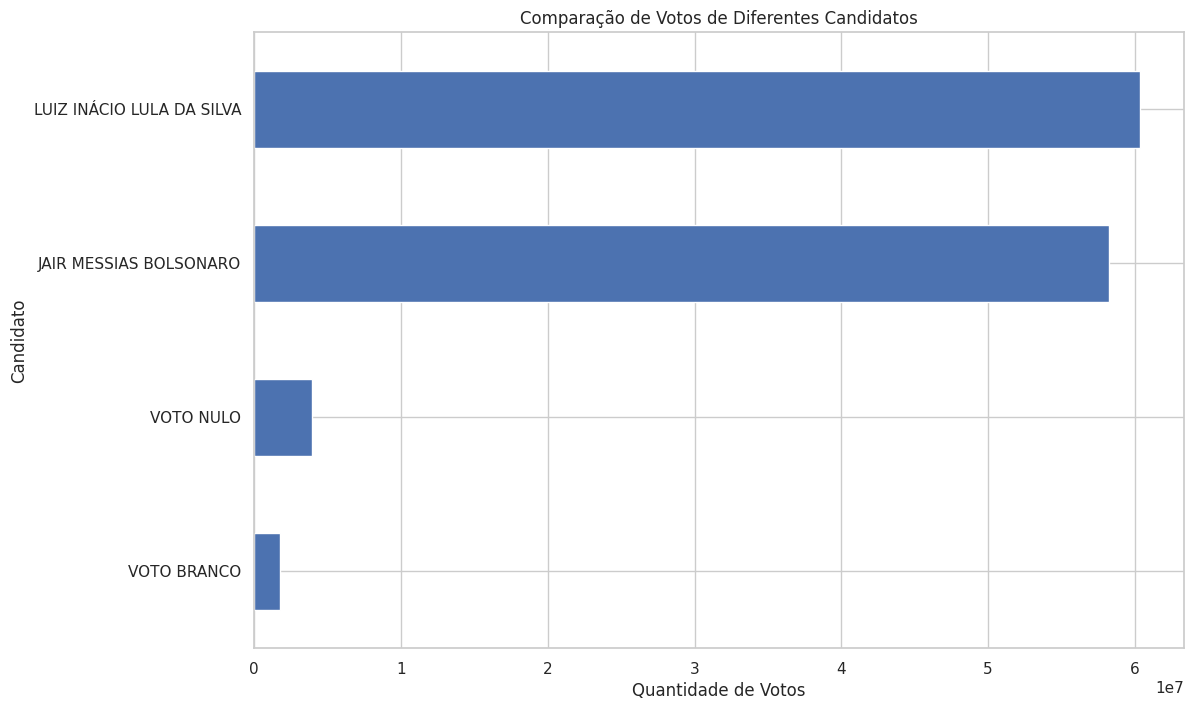

In [46]:
#Comparação de Votos de Diferentes Candidatos:
plt.figure(figsize=(12, 8))
df_secao_2t.groupby('NM_VOTAVEL')['QT_VOTOS'].sum().sort_values().plot(kind='barh')
plt.title('Comparação de Votos de Diferentes Candidatos')
plt.xlabel('Quantidade de Votos')
plt.ylabel('Candidato')
plt.show()



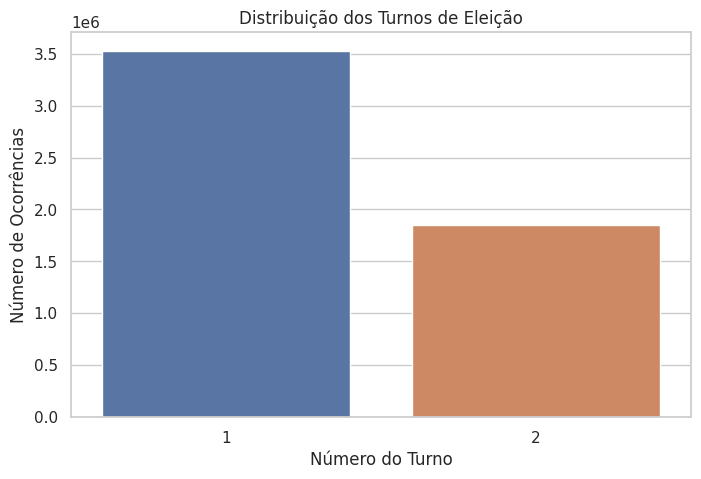

In [47]:
# Análise dos Turnos de Eleição
plt.figure(figsize=(8, 5))
sns.countplot(data=df_secao, x='NR_TURNO')
plt.title('Distribuição dos Turnos de Eleição')
plt.xlabel('Número do Turno')
plt.ylabel('Número de Ocorrências')
plt.show()

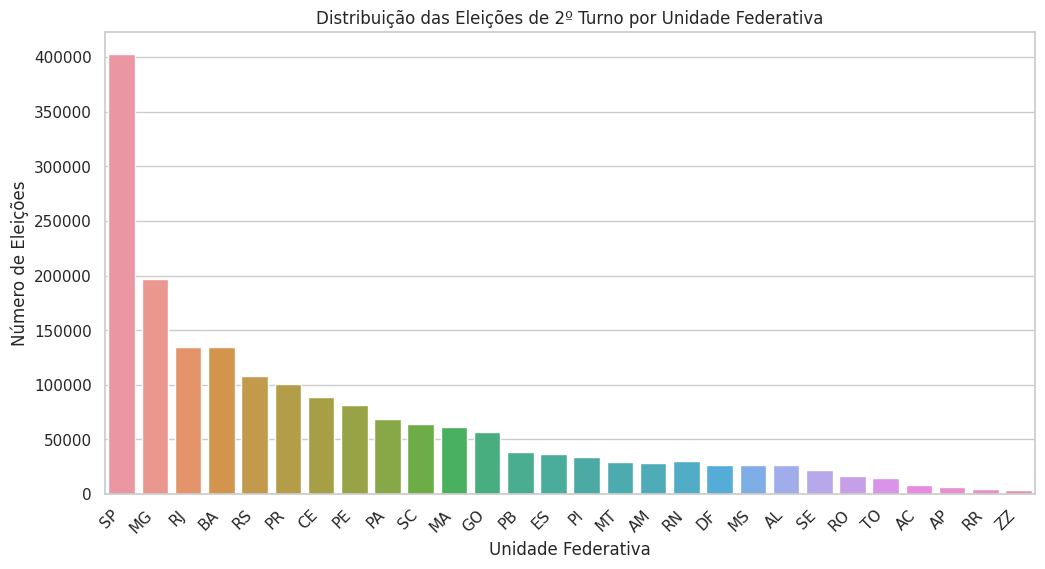

In [45]:
#Variação Geográfica das Eleições
plt.figure(figsize=(12, 6))
sns.countplot(data=df_secao_2t, x='SG_UF', order=df_secao['SG_UF'].value_counts().index)
plt.title('Distribuição das Eleições de 2º Turno por Unidade Federativa')
plt.xlabel('Unidade Federativa')
plt.ylabel('Número de Eleições')
plt.xticks(rotation=45, ha='right')
plt.show()

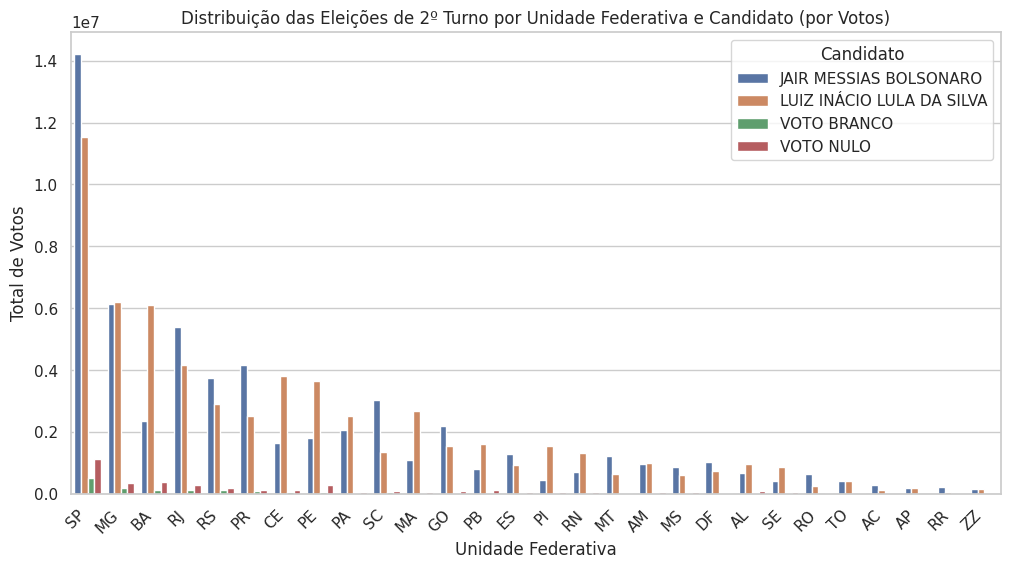

In [48]:
# Variação Geográfica das Eleições de 2º Turno por Candidato
df_grouped = df_secao_2t.groupby(['SG_UF', 'NM_VOTAVEL'])['QT_VOTOS'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=df_grouped, x='SG_UF', y='QT_VOTOS', hue='NM_VOTAVEL', order=df_secao_2t['SG_UF'].value_counts().index)
plt.title('Distribuição das Eleições de 2º Turno por Unidade Federativa e Candidato (por Votos)')
plt.xlabel('Unidade Federativa')
plt.ylabel('Total de Votos')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Candidato')
plt.show()

In [81]:
# total de votos do segundo turno
df_secao_2t[['NM_VOTAVEL','QT_VOTOS']].groupby(['NM_VOTAVEL']).sum().sort_values(by='QT_VOTOS',ascending=False)

,QT_VOTOS
NM_VOTAVEL,
LUIZ INÁCIO LULA DA SILVA,60345999
JAIR MESSIAS BOLSONARO,58206354
VOTO NULO,3930765
VOTO BRANCO,1769678


In [82]:
# Bolsonaro
df_secao_2t_bolsonaro = df_secao.query('NR_TURNO==2 and NR_VOTAVEL==22')
df_secao_2t_bolsonaro['QT_VOTOS'].describe()

count    471884.000000
mean        123.348861
std          54.608497
min           1.000000
25%          84.000000
50%         127.000000
75%         162.000000
max         549.000000
Name: QT_VOTOS, dtype: float64

In [83]:
# Lula
df_secao_2t_lula = df_secao.query('NR_TURNO==2 and NR_VOTAVEL==13')
df_secao_2t_lula['QT_VOTOS'].describe()

count    472023.000000
mean        127.845463
std          48.249222
min           1.000000
25%          92.000000
50%         123.000000
75%         160.000000
max         530.000000
Name: QT_VOTOS, dtype: float64

Gráfico de distribuição espacial

In [84]:
!pip install --upgrade mapclassify

In [85]:
import geopandas as gpd
import numpy as np
import matplotlib.colors as clrs

In [86]:
#Criar tabela
df_secao_2t = df_secao.query('NR_TURNO == 2')
df_pvt_2t = pd.pivot_table(df_secao_2t, index='NM_MUNICIPIO', values='QT_VOTOS', columns='NM_VOTAVEL', aggfunc=np.sum, fill_value=0).reset_index()


#base cartografica
https://www.ibge.gov.br/geociencias/downloads-geociencias.html?caminho=cartas_e_mapas/bases_cartograficas_continuas/bc250/versao2021/
passos: salvei o arquivo; abri no Qgis; selecionei apenas o layer municipios; salvei novamente apenas o layer com o nome municipios

Pré-análise

In [87]:
gdf_mun250 = gpd.read_file('/content/drive/MyDrive/casecolab/municipios.gpkg')
gdf_mun250

,id,nome,geometriaaproximada,geocodigo,anodereferencia,geometry
0,1,Acajutiba,Não,2900306,NaN,"MULTIPOLYGON (((-38.08154 -11.61072, -38.08087..."
1,2,Aporá,Não,2901908,NaN,"MULTIPOLYGON (((-38.14169 -11.80348, -38.14440..."
2,3,Campestre do Maranhão,Não,2102556,NaN,"MULTIPOLYGON (((-47.04383 -6.19768, -47.04673 ..."
3,4,Porto Murtinho,Não,5006903,NaN,"MULTIPOLYGON (((-56.94176 -21.59373, -56.94243..."
4,5,Pimenteiras do Oeste,Não,1101468,NaN,"MULTIPOLYGON (((-60.91895 -13.54821, -60.91808..."
...,...,...,...,...,...,...
5565,5568,Ibitirama,Não,3202553,NaN,"MULTIPOLYGON (((-41.78327 -20.50433, -41.78749..."
5566,5569,Marataízes,Não,3203320,NaN,"MULTIPOLYGON (((-40.92598 -21.18994, -40.92658..."
5567,5570,Buriti dos Lopes,Não,2202000,NaN,"MULTIPOLYGON (((-41.74526 -3.46276, -41.74556 ..."
5568,5620,Vitória,Não,3205309,NaN,"MULTIPOLYGON (((-40.28967 -20.30170, -40.28958..."


In [88]:
df_pvt_2t = df_pvt_2t.rename(columns={"NM_MUNICIPIO": "nome"})
df_pvt_2t

NM_VOTAVEL,nome,JAIR MESSIAS BOLSONARO,LUIZ INÁCIO LULA DA SILVA,VOTO BRANCO,VOTO NULO
0,ABADIA DE GOIÁS,5394,3814,79,110
1,ABADIA DOS DOURADOS,2160,2351,50,128
2,ABADIÂNIA,5759,2774,81,155
3,ABAETETUBA,25118,72313,864,1313
4,ABAETÉ,7696,6302,189,264
...,...,...,...,...,...
5422,ÁUREA,1634,1084,63,60
5423,ÂNGULO,1437,729,22,52
5424,ÉRICO CARDOSO,1175,4915,83,278
5425,ÓBIDOS,8577,19876,236,410


In [89]:
gdf_mun250['nome'] = gdf_mun250['nome'].str.upper()
gdf_mun250

,id,nome,geometriaaproximada,geocodigo,anodereferencia,geometry
0,1,ACAJUTIBA,Não,2900306,NaN,"MULTIPOLYGON (((-38.08154 -11.61072, -38.08087..."
1,2,APORÁ,Não,2901908,NaN,"MULTIPOLYGON (((-38.14169 -11.80348, -38.14440..."
2,3,CAMPESTRE DO MARANHÃO,Não,2102556,NaN,"MULTIPOLYGON (((-47.04383 -6.19768, -47.04673 ..."
3,4,PORTO MURTINHO,Não,5006903,NaN,"MULTIPOLYGON (((-56.94176 -21.59373, -56.94243..."
4,5,PIMENTEIRAS DO OESTE,Não,1101468,NaN,"MULTIPOLYGON (((-60.91895 -13.54821, -60.91808..."
...,...,...,...,...,...,...
5565,5568,IBITIRAMA,Não,3202553,NaN,"MULTIPOLYGON (((-41.78327 -20.50433, -41.78749..."
5566,5569,MARATAÍZES,Não,3203320,NaN,"MULTIPOLYGON (((-40.92598 -21.18994, -40.92658..."
5567,5570,BURITI DOS LOPES,Não,2202000,NaN,"MULTIPOLYGON (((-41.74526 -3.46276, -41.74556 ..."
5568,5620,VITÓRIA,Não,3205309,NaN,"MULTIPOLYGON (((-40.28967 -20.30170, -40.28958..."


In [90]:
gdf_mun250_2t = gdf_mun250.merge(df_pvt_2t, on='nome')
gdf_mun250_2t

,id,nome,geometriaaproximada,geocodigo,anodereferencia,geometry,JAIR MESSIAS BOLSONARO,LUIZ INÁCIO LULA DA SILVA,VOTO BRANCO,VOTO NULO
0,1,ACAJUTIBA,Não,2900306,NaN,"MULTIPOLYGON (((-38.08154 -11.61072, -38.08087...",1788,6812,99,411
1,2,APORÁ,Não,2901908,NaN,"MULTIPOLYGON (((-38.14169 -11.80348, -38.14440...",2069,7891,149,517
2,3,CAMPESTRE DO MARANHÃO,Não,2102556,NaN,"MULTIPOLYGON (((-47.04383 -6.19768, -47.04673 ...",2249,4994,70,97
3,4,PORTO MURTINHO,Não,5006903,NaN,"MULTIPOLYGON (((-56.94176 -21.59373, -56.94243...",2741,2451,32,174
4,5,PIMENTEIRAS DO OESTE,Não,1101468,NaN,"MULTIPOLYGON (((-60.91895 -13.54821, -60.91808...",943,495,14,15
...,...,...,...,...,...,...,...,...,...,...
5499,5568,IBITIRAMA,Não,3202553,NaN,"MULTIPOLYGON (((-41.78327 -20.50433, -41.78749...",3783,1728,93,203
5500,5569,MARATAÍZES,Não,3203320,NaN,"MULTIPOLYGON (((-40.92598 -21.18994, -40.92658...",15978,7689,343,587
5501,5570,BURITI DOS LOPES,Não,2202000,NaN,"MULTIPOLYGON (((-41.74526 -3.46276, -41.74556 ...",3349,9715,111,323
5502,5620,VITÓRIA,Não,3205309,NaN,"MULTIPOLYGON (((-40.28967 -20.30170, -40.28958...",115293,95478,3789,6385


In [91]:
gdf_mun250_2t.columns


Index(['id', 'nome', 'geometriaaproximada', 'geocodigo', 'anodereferencia',
       'geometry', 'JAIR MESSIAS BOLSONARO', 'LUIZ INÁCIO LULA DA SILVA',
       'VOTO BRANCO', 'VOTO NULO'],
      dtype='object')

In [92]:
# nomes dos candidatos
jmb = 'JAIR MESSIAS BOLSONARO'
lil = 'LUIZ INÁCIO LULA DA SILVA'
vb = 'VOTO BRANCO'
vn = 'VOTO NULO'

# Análises espaciais

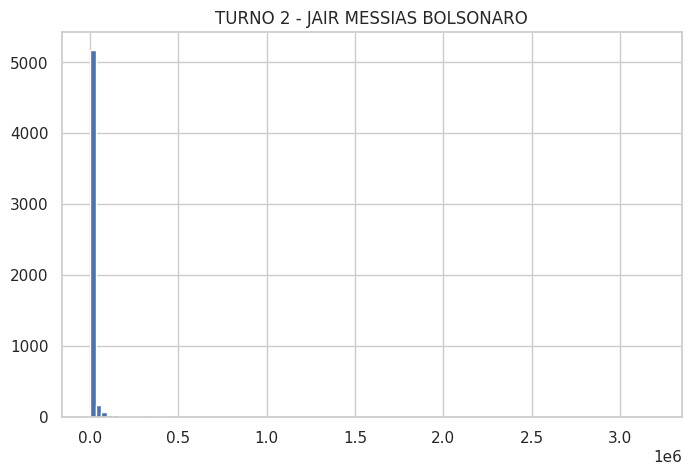

In [93]:
candidat = jmb
fig, ax = plt.subplots(figsize=(8,5))
ax.hist(gdf_mun250_2t[candidat], bins=100);
ax.set_title(f'TURNO 2 - {candidat}');

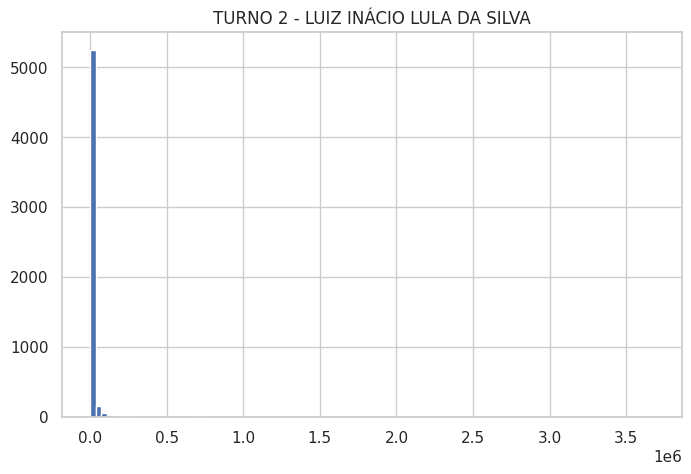

In [94]:
candidat = lil
fig, ax = plt.subplots(figsize=(8,5))
ax.hist(gdf_mun250_2t[candidat], bins=100);
ax.set_title(f'TURNO 2 - {candidat}');

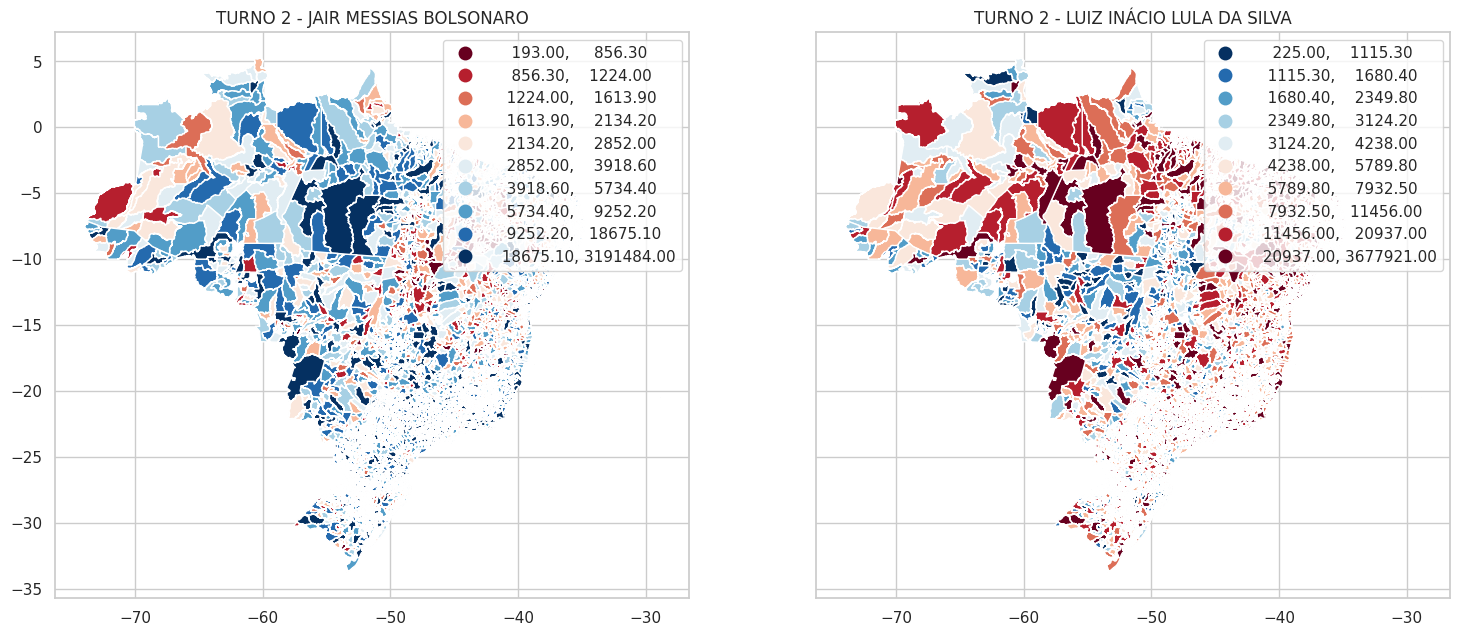

In [95]:
gdf = gdf_mun250_2t
candidat1 = jmb
candidat2 = lil

fig, axs = plt.subplots(1, 2, sharey=True, figsize=(18,15))

ax = axs[0]
gdf.plot(ax=ax, column=candidat1, legend=True, cmap='RdBu', scheme='Quantiles', k=10)
ax.set_title(f'TURNO 2 - {candidat1}');

ax = axs[1]
gdf.plot(ax=ax, column=candidat2, legend=True, cmap='RdBu_r', scheme='Quantiles', k=10)
ax.set_title(f'TURNO 2 - {candidat2}');

In [96]:
gdf = gdf_mun250_2t
candidat1 = jmb
candidat2 = lil

gdf['soma_cands'] = gdf[candidat1] + gdf[candidat2]
gdf[f'perc_{candidat1}'] = (gdf[candidat1]*100) / gdf['soma_cands']
gdf[f'perc_{candidat2}'] = (gdf[candidat2]*100) / gdf['soma_cands']

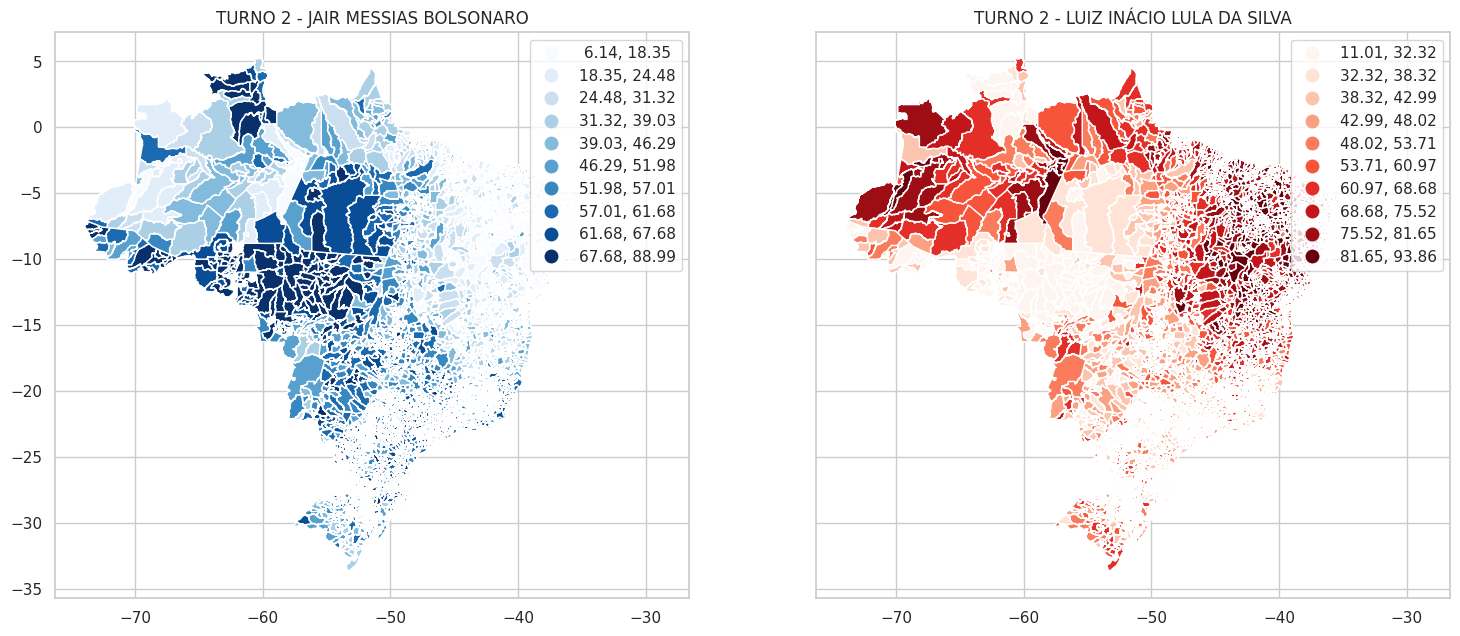

In [97]:
#Porcentagem
gdf = gdf_mun250_2t
candidat1 = jmb
candidat2 = lil

fig, axs = plt.subplots(1, 2, sharey=True, figsize=(18,15))

ax = axs[0]
gdf.plot(ax=ax, column=gdf[f'perc_{candidat1}'], legend=True, cmap='Blues', scheme='Quantiles', k=10)
ax.set_title(f'TURNO 2 - {candidat1}');

ax = axs[1]
gdf.plot(ax=ax, column=gdf[f'perc_{candidat2}'], legend=True, cmap='Reds', scheme='Quantiles', k=10)
ax.set_title(f'TURNO 2 - {candidat2}');

<ipython-input-98-b4180f4805dc>:14: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  ax.scatter(gdf.geometry.centroid.x, gdf.geometry.centroid.y,


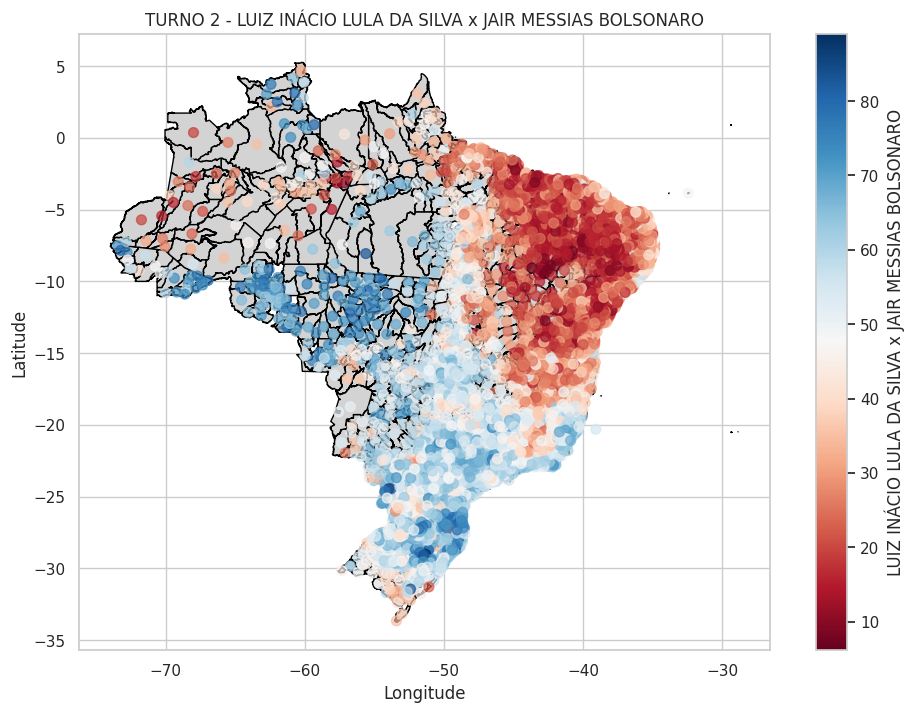

In [98]:
import matplotlib.pyplot as plt


gdf = gdf_mun250_2t
candidat1 = jmb
candidat2 = lil

fig, ax = plt.subplots(figsize=(12, 8))


gdf.plot(ax=ax, color='lightgrey', edgecolor='black')


ax.scatter(gdf.geometry.centroid.x, gdf.geometry.centroid.y,
           c=gdf[f'perc_{candidat1}'], cmap='RdBu', s=50, alpha=0.7)
ax.set_title(f'TURNO 2 - {candidat2} x {candidat1}')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Adicione uma barra de cores
sm = plt.cm.ScalarMappable(cmap='RdBu', norm=plt.Normalize(vmin=gdf[f'perc_{candidat1}'].min(),
                                                            vmax=gdf[f'perc_{candidat1}'].max()))
sm._A = []  # Para evitar erro de escala
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label(f'{candidat2} x {candidat1}')

plt.show()


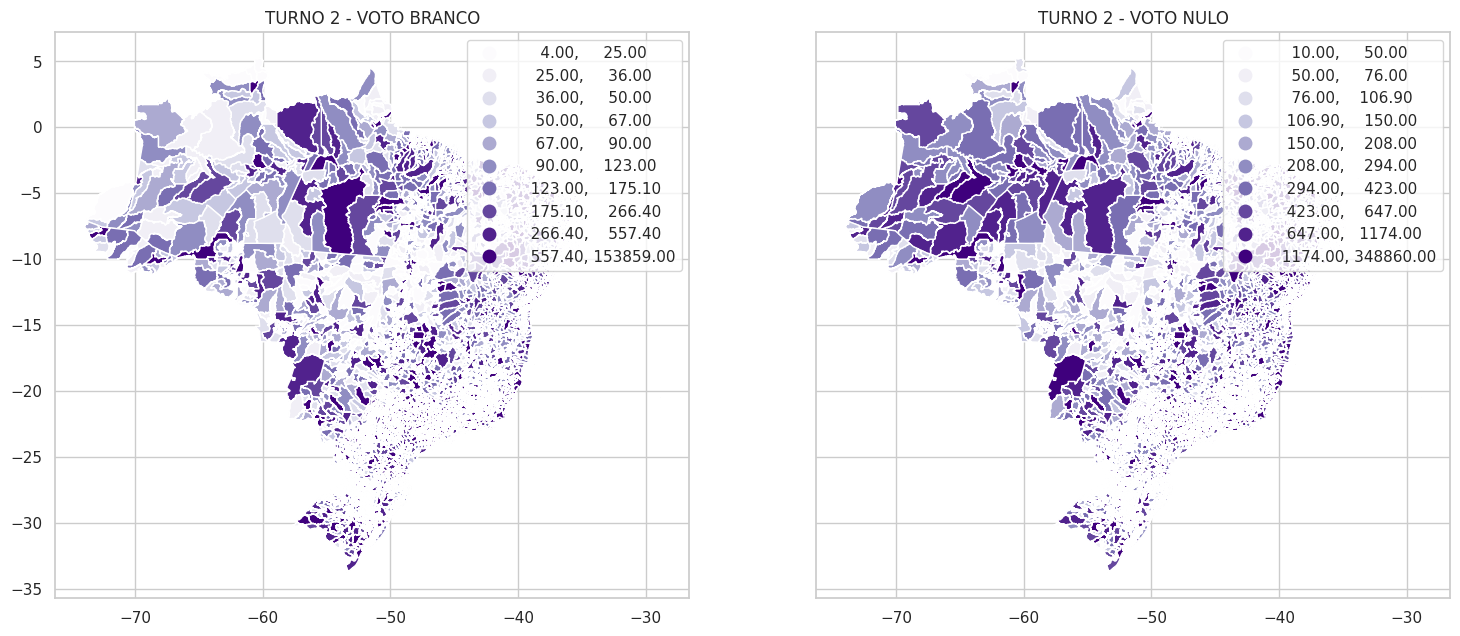

In [99]:
vb = 'VOTO BRANCO'
vn = 'VOTO NULO'
cmap = 'Purples'

fig, axs = plt.subplots(1, 2, sharey=True, figsize=(18,15))

ax = axs[0]
gdf.plot(ax=ax, column=gdf[vb], legend=True, cmap=cmap, scheme='Quantiles', k=10)
ax.set_title(f'TURNO 2 - {vb}');

ax = axs[1]
gdf.plot(ax=ax, column=gdf[vn], legend=True, cmap=cmap, scheme='Quantiles', k=10)
ax.set_title(f'TURNO 2 - {vn}');


Votos Brancos: Votos brancos são aqueles em que o eleitor comparece às urnas no dia da eleição, mas, ao invés de escolher um candidato específico, opta por não marcar nenhum nome na cédula ou apertar o botão de voto. Os votos brancos são contabilizados como válidos, ou seja, eles são considerados parte do total de votos contados, mas não são atribuídos a nenhum candidato em particular.

Votos Nulos: Votos nulos são votos que não são considerados válidos pelas autoridades eleitorais. Eles ocorrem quando o eleitor realiza alguma ação que invalida a cédula, como escrever um nome que não seja um dos candidatos ou fazer desenhos na cédula de votação. Os votos nulos não são contabilizados para nenhum candidato e, portanto, não influenciam no resultado final da eleição.

Tanto votos brancos quanto nulos são formas de expressar uma escolha de não votar em nenhum dos candidatos. Enquanto os votos brancos são registrados como válidos e contabilizados no total de votos, os votos nulos são considerados inválidos e não têm impacto direto nos resultados eleitorais. Essas escolhas podem ser motivadas por diferentes razões, como protesto, indecisão ou insatisfação com as opções de candidatos.

Conclusão

A polarização política, que esteve em evidência durante todo o processo eleitoral, também se manifestou na distribuição geográfica dos votos, como é possível observar nos gráficos acima. Destaca-se a região nordeste e norte com um forte apoio ao candidato Lula, enquanto o eixo centro-oeste, sul e sudeste demonstrou um apoio significativo ao candidato Bolsonaro. É notável o caso de Minas Gerais, no sudeste, sendo o único estado que teve sua maioria de votos no atual presidente, Lula.

Essa divisão eleitoral regionalizada reflete não apenas as diferenças ideológicas entre as regiões, mas também as preocupações específicas de cada localidade, bem como a influência de líderes políticos locais e questões de relevância regional. A análise da distribuição geográfica dos votos é essencial para compreender as complexidades da política brasileira e as motivações por trás das escolhas eleitorais em um contexto de polarização e diversidade de opiniões.